In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from data_utils import generate_ground_truth_matrix, ground_truth_matrix_to_dataset, correlation
import reclab

[0.7159780687387708, 0.7173840126889091, 0.7601534209612653, 0.6884714153907534, 0.7138045074336326, 0.7074723407739981, 0.6892259835803077, 0.6897094828514084, 0.7437618451453873, 0.7400573658533867]


/var/folders/p2/v6y91c591nq_2q129bwd64bc0000gn/T/ipykernel_48319/1573723258.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


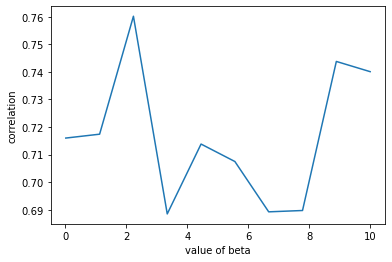

In [2]:
# Beta vs Pearson correlation

def correlation_train(beta, correlation_metric):
    truth = generate_ground_truth_matrix(
        (1000, 1000), environment='latent-dynamic-v1')
    users, items, ratings, P, R = ground_truth_matrix_to_dataset(
        truth, quantization='onetofive', bias='full underlying', beta=beta)
    return correlation(P, R, correlation_metric)


beta = np.linspace(0.01, 10, 10)
pearson = [correlation_train(i, 'spearman') for i in beta]
print(pearson)
fig1, ax = plt.subplots()
ax.plot(beta, pearson)
ax.set(xlabel='value of beta', ylabel='correlation')
fig1.show()
